**Guidelines.**

1. Set up your development environment and API access to use Gemini.
2. Generate text responses from text inputs.
3. Generate text responses from multimodel inputs(text and images).
4. Use Gemini for multi-turn conversations (chat).
5. Use embeddings for large language models.

In [1]:
!pip install -q -U google-generativeai

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown

def to_markdown(text):
  text = text.replace('*', '  *')
  return Markdown(textwrap.indent(text, '>', predicate=lambda _: True))

In [3]:
#Used to securely store your API key
from google.colab import userdata

***Setup Your API Key***

In [4]:
GENAI = userdata.get("GENAI")

genai.configure(api_key=GENAI)

**LIST MODELS**

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro-vision-latest
models/gemini-pro-vision
models/gemini-1.5-pro-latest
models/gemini-1.5-pro-001
models/gemini-1.5-pro-002
models/gemini-1.5-pro
models/gemini-1.5-flash-latest
models/gemini-1.5-flash-001
models/gemini-1.5-flash-001-tuning
models/gemini-1.5-flash
models/gemini-1.5-flash-002
models/gemini-1.5-flash-8b
models/gemini-1.5-flash-8b-001
models/gemini-1.5-flash-8b-latest
models/gemini-1.5-flash-8b-exp-0827
models/gemini-1.5-flash-8b-exp-0924
models/gemini-2.0-flash-exp
models/gemini-2.0-flash
models/gemini-2.0-flash-001
models/gemini-2.0-flash-lite-001
models/gemini-2.0-flash-lite
models/gemini-2.0-flash-lite-preview-02-05
models/gemini-2.0-flash-lite-preview
models/gemini-2.0-pro-exp
models/gemini-2.0-pro-exp-02-05
models/gemini-exp-1206
models/gemini-2.0-flash-thinking-exp-01-21
models/gemini-2.0-flash-thinking-exp
models/gemini-2.0-flash-thinking-exp-1219
models/learnlm-1.5-pro-experimental


**CALL MODEL**

In [13]:
model = genai.GenerativeModel('models/gemini-1.5-pro-001')

In [14]:
model

genai.GenerativeModel(
    model_name='models/gemini-1.5-pro-001',
    generation_config={},
    safety_settings={},
    tools=None,
    system_instruction=None,
    cached_content=None
)

***GENERATE CONTENT***

In [15]:
%%time
response = model.generate_content("What is the meaning of life?")

CPU times: user 114 ms, sys: 19.5 ms, total: 134 ms
Wall time: 9.12 s


In [16]:
response

response:
GenerateContentResponse(
    done=True,
    iterator=None,
    result=protos.GenerateContentResponse({
      "candidates": [
        {
          "content": {
            "parts": [
              {
                "text": "The meaning of life is a question that has been pondered by philosophers, theologians, artists, and individuals for centuries. There's no single, universally accepted answer, as the meaning of life can be deeply personal and subjective. \n\nHere are some perspectives to consider:\n\n**Philosophical Approaches:**\n\n* **Nihilism:** Life has no inherent meaning or purpose.\n* **Existentialism:** We are free to create our own meaning and purpose.\n* **Absurdism:** The search for meaning is inherently futile, but we should embrace the absurdity of it all.\n* **Humanism:**  Finding meaning in human connection, growth, and contribution to society.\n* **Naturalism:**  Meaning is found through our connection to the natural world and our place in the grand scheme of 

In [17]:
response.text

"The meaning of life is a question that has been pondered by philosophers, theologians, artists, and individuals for centuries. There's no single, universally accepted answer, as the meaning of life can be deeply personal and subjective. \n\nHere are some perspectives to consider:\n\n**Philosophical Approaches:**\n\n* **Nihilism:** Life has no inherent meaning or purpose.\n* **Existentialism:** We are free to create our own meaning and purpose.\n* **Absurdism:** The search for meaning is inherently futile, but we should embrace the absurdity of it all.\n* **Humanism:**  Finding meaning in human connection, growth, and contribution to society.\n* **Naturalism:**  Meaning is found through our connection to the natural world and our place in the grand scheme of the universe.\n\n**Religious and Spiritual Beliefs:**\n\n* Many religions offer answers about the meaning of life, often involving serving a higher power, achieving enlightenment, or fulfilling a divine purpose. \n\n**Personal Pers

In [18]:
to_markdown(response.text)

>The meaning of life is a question that has been pondered by philosophers, theologians, artists, and individuals for centuries. There's no single, universally accepted answer, as the meaning of life can be deeply personal and subjective. 
>
>Here are some perspectives to consider:
>
>  *  *Philosophical Approaches:  *  *
>
>  *   *  *Nihilism:  *  * Life has no inherent meaning or purpose.
>  *   *  *Existentialism:  *  * We are free to create our own meaning and purpose.
>  *   *  *Absurdism:  *  * The search for meaning is inherently futile, but we should embrace the absurdity of it all.
>  *   *  *Humanism:  *  *  Finding meaning in human connection, growth, and contribution to society.
>  *   *  *Naturalism:  *  *  Meaning is found through our connection to the natural world and our place in the grand scheme of the universe.
>
>  *  *Religious and Spiritual Beliefs:  *  *
>
>  * Many religions offer answers about the meaning of life, often involving serving a higher power, achieving enlightenment, or fulfilling a divine purpose. 
>
>  *  *Personal Perspectives:  *  *
>
>  *   *  *Relationships and love:  *  * Finding meaning in connecting with others, building relationships, and experiencing love.
>  *   *  *Growth and self-actualization:  *  * Continuously learning, growing, and striving to reach our full potential.
>  *   *  *Contribution and legacy:  *  * Making a positive impact on the world and leaving something behind.
>  *   *  *Happiness and fulfillment:  *  * Pursuing joy, contentment, and experiences that make life worthwhile.
>
>  *  *Ultimately, the meaning of life is what you make it.  *  * It's about finding what gives your life purpose and value. This could involve a combination of the perspectives mentioned above or something entirely unique to you. 
>
>  *  *Instead of seeking a definitive answer, you might consider exploring these questions:  *  *
>
>  * What brings you joy and fulfillment?
>  * What values are most important to you?
>  * What impact do you want to make on the world?
>
>The answers to these questions can guide you toward a life filled with meaning, purpose, and personal satisfaction. 


In [19]:
response.prompt_feedback

In [20]:
response.candidates

[index: 0
content {
  parts {
    text: "The meaning of life is a question that has been pondered by philosophers, theologians, artists, and individuals for centuries. There\'s no single, universally accepted answer, as the meaning of life can be deeply personal and subjective. \n\nHere are some perspectives to consider:\n\n**Philosophical Approaches:**\n\n* **Nihilism:** Life has no inherent meaning or purpose.\n* **Existentialism:** We are free to create our own meaning and purpose.\n* **Absurdism:** The search for meaning is inherently futile, but we should embrace the absurdity of it all.\n* **Humanism:**  Finding meaning in human connection, growth, and contribution to society.\n* **Naturalism:**  Meaning is found through our connection to the natural world and our place in the grand scheme of the universe.\n\n**Religious and Spiritual Beliefs:**\n\n* Many religions offer answers about the meaning of life, often involving serving a higher power, achieving enlightenment, or fulfill

***THIS STEP WILL DISPLAY THE RESPONSE IN CHUNKS***

In [22]:
%%time
response = model.generate_content("How to learn AI from scratch?", stream = True)

CPU times: user 222 ms, sys: 23 ms, total: 245 ms
Wall time: 18.5 s


In [23]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

Learning
________________________________________________________________________________
 AI from scratch is a journey that requires dedication and the right approach. Here'
________________________________________________________________________________
s a structured roadmap to guide you:

**1. Build Foundational Math
________________________________________________________________________________
 and Programming Skills**

* **Mathematics:**
    * **Linear Algebra:** Vectors, matrices, matrix operations, eigenvalues, eigenvectors. (Essential for understanding how
________________________________________________________________________________
 data is represented and manipulated in AI algorithms)
    * **Calculus:** Derivatives, gradients, optimization problems. (Crucial for understanding how machine learning algorithms learn
________________________________________________________________________________
 from data)
    * **Probability and Statistics:** Probability distributions, 

In [24]:
# prompt: give me code to download the above response in

from google.colab import files

# Assuming 'response.text' holds the content you want to download
with open('response.txt', 'w') as f:
  f.write(response.text)

files.download('response.txt')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
# prompt: give me code to download the image in curl

# ... (your existing code)

# Assuming 'response.text' holds the content you want to download
image_url = "https://www.easygifanimator.net/images/samples/video-to-gif-sample.gif" # Example image URL. Replace with the actual URL from response.text

!curl -o downloaded_image.gif "{image_url}"

files.download('downloaded_image.gif')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  940k  100  940k    0     0   520k      0  0:00:01  0:00:01 --:--:--  520k


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
# prompt: give curl code to download the diet food image in jpg format

# ... (your existing code)

# Assuming 'response.text' holds the content you want to download
image_url = "https://www.eatingwell.com/thmb/8MXOea6bVolkuLNQ1HhNt1tryIE=/750x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/article_7866255_foods-you-should-eat-every-week-to-lose-weight_-04-d58e9c481bce4a29b47295baade4072d.jpg"  # Replace with the actual image URL

!curl -o diet_food.jpg "{image_url}"

files.download('diet_food.jpg')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 87534  100 87534    0     0   173k      0 --:--:-- --:--:-- --:--:--  173k


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
import PIL.Image

img = PIL.Image.open('diet_food.jpg')


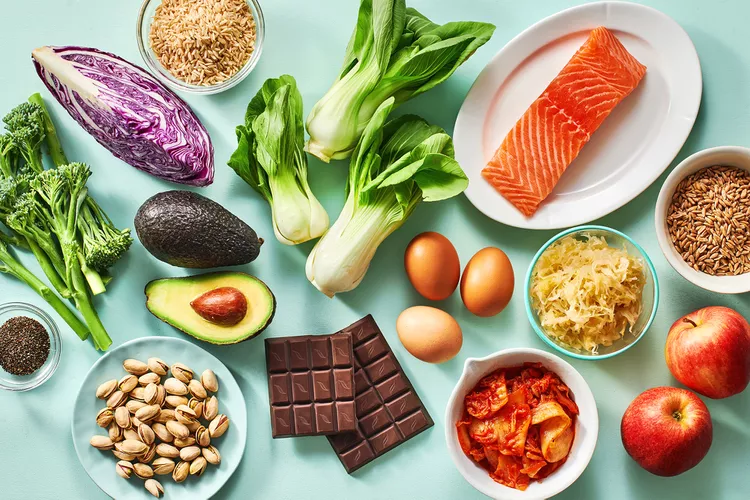

In [30]:
img

In [37]:
model = genai.GenerativeModel("models/gemini-1.5-flash")

In [38]:
response = model.generate_content(img)
to_markdown(response.text)

>Here's a description of the image:
>
>The image shows a variety of foods arranged on a light teal surface.  It's clearly designed to showcase a healthy and balanced diet, likely highlighting foods rich in different nutrients. 
>
>
>Here's a breakdown of the visible foods:
>
>  *   *  *Protein Sources:  *  * Salmon fillet, eggs, pistachios.
>  *   *  *Healthy Fats:  *  * Avocados.
>  *   *  *Carbohydrates:  *  * Brown rice, oats.
>  *   *  *Fruits:  *  * Apples.
>  *   *  *Vegetables:  *  * Bok choy, red cabbage, broccoli, sauerkraut, kimchi.
>  *   *  *Other:  *  * Dark chocolate, chia seeds.
>
>
>The arrangement is neat and visually appealing, emphasizing the colorful variety and freshness of the ingredients.  The overall impression is one of a nutrient-dense, balanced meal plan focused on whole, unprocessed foods.


***GIVING COMMAND TO MODEL***

In [39]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include my weight loss journey.", img], stream=True)
response.resolve()

In [40]:
to_markdown(response.text)

>## My Colorful Plate to a Lighter Me: A Weight Loss Journey
>
>This picture isn't just a pretty arrangement of food; it's a snapshot of my weight loss journey!  For months, I struggled with unhealthy eating habits and the accompanying weight gain.  Then I decided enough was enough.  It wasn't about restrictive diets, but about making sustainable changes.
>
>This plate represents my new approach.  It's all about balance and choosing nutrient-rich foods. The salmon provides lean protein, while the broccoli, bok choy, and red cabbage offer essential vitamins and fiber.  The avocados and pistachios provide healthy fats to keep me feeling full and satisfied.  The brown rice and oats are complex carbs for sustained energy, and a small square of dark chocolate satisfies my sweet cravings.  
>
>And yes, the fermented foods like kimchi and sauerkraut are in there too!  They're amazing for gut health, something I learned was crucial in my weight loss journey.  Finally, apples – a simple, sweet, and satisfying snack.
>
>This wasn't an overnight transformation. There were slip-ups, cravings, and moments of self-doubt.  But focusing on colorful, whole foods, along with regular exercise, helped me gradually lose weight and, more importantly, feel healthier and more energetic.  This plate isn't a magic bullet, but it's a reminder of the delicious and sustainable path I've chosen.  What are your favorite healthy go-to foods? Share in the comments!
